# Downloading and Aggregating HRRR Data
## Xarray & Brian Blaylock Functions
This notebook serves as an example of how to fetch data from the HRRR archive using the tooling provided by
Brian Blaylock at the University of Utah. His GitHub repo where all of the function documentation exists is
located at https://github.com/blaylockbk/pyBKB_v3.

The documentation that helped solve my problem of accumulating a time series into xarray is located at
stack overflow -> https://stackoverflow.com/questions/33435953/is-it-possible-to-append-to-an-xarray-dataset

The xarray documentation website, http://xarray.pydata.org/en/stable/index.html, has also been a valuable resource.

In [1]:
from datetime import datetime, timedelta
import os
import numpy as np
import matplotlib.pyplot as plt
import pygrib
import pandas as pd
import xarray as xr

import sys
sys.path.append('/home/wdownin/pyBKB_v3')
from BB_HRRR.HRRR_Pando import *

In [2]:
import sys
sys.path.append('/home/wdownin/pyBKB_v3')
from BB_HRRR.HRRR_Pando import *

## The number of variables that may be of use or interest to this study are below

In [3]:
variables = ['VIS:surface', 'GUST:surface', 'TMP:surface', 'CNWAT:surface', 'WEASD:surface', 'SNOWC:surface',
       'SNOD:surface', 'TMP:2 m', 'POT:2 m', 'SPFH:2 m', 'DPT:2 m', 'RH:2 m', 'UGRD:10 m', 'VGRD:10 m',
       'WIND:10 m', 'MAXUW:10 m', 'MAXVW:10 m', 'CPOFP:surface', 'PRATE:surface', 'APCP:surface',
       'WEASD:surface', 'FROZR:surface', 'FRZR:surface', 'SSRUN:surface', 'CSNOW:surface', 'CICEP:surface'
       'CRAIN:surface', 'SFCR:surface', 'FRICV:surface', 'GFLUX:surface', 'CAPE:surface', 'CIN:surface',
       'DSWRF:surface']
print("Number of Explanatory Variables: " + str(len(variables)))

Number of Explanatory Variables: 32


## Quick example of a single variable.
The 32 variable donwload process will be detailed shortly but the following lines will show the
data downloaded, subset, and plotted. Plotting the data requires a projection because the HRRR
data is using a Lambert Conformal Conic projection.

In [22]:
date = datetime(2018,4,1,0,0)
x = get_hrrr_variable(date,'UVGRD:10 m')


 >> Dowloading tempfile: ./temp_hrrr_2018040100_f00_UVG.grib2
Oh, good, you requested a date that should be on Pando.
GRIB2 File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180401/hrrr.t00z.wrfsfcf00.grib2
 .idx File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180401/hrrr.t00z.wrfsfcf00.grib2.idx
 >> Matched a variable:  59:40779694:d=2018040100:UGRD:10 m above ground:anl:
 >> Byte Range: 40779694 42992844
 >> Converting winds to earth-relative
 _______________________________________________________________
 !!   Run Date Requested : 2018-04-01 00:00:00 F00
 !! Valid Date Requested : 2018-04-01 00:00:00
 !!     Current UTC time : 2019-09-04 13:22:38.594724
 !! ------------------------------------------------------------
 !! ERROR downloading GRIB2: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180401/hrrr.t00z.wrfsfcf00.grib2
 !! Is the variable right? UVGRD:10 m
 !! Does the .idx file exist? https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180401/hrrr.t00z.wrfsfcf00.grib2.idx
 ------

In [20]:
# A view of the data structure
x

{'value': array([[-4.8424425, -4.8424425, -4.8424425, ..., -3.5924425, -3.5924425,
         -3.6549425],
        [-4.9049425, -4.9049425, -4.8424425, ..., -3.6549425, -3.6549425,
         -3.5924425],
        [-4.9049425, -4.9674425, -4.9049425, ..., -3.6549425, -3.7174425,
         -3.6549425],
        ...,
        [-6.5924425, -6.6549425, -6.5924425, ..., -8.4049425, -8.6549425,
         -8.8424425],
        [-6.6549425, -6.6549425, -6.5924425, ..., -8.4049425, -8.6549425,
         -8.8424425],
        [-6.5924425, -6.5924425, -6.5924425, ..., -8.5924425, -8.7799425,
         -8.9049425]], dtype=float32),
 'lat': array([[21.138123  , 21.14511004, 21.1520901 , ..., 21.1545089 ,
         21.14753125, 21.14054663],
        [21.16299459, 21.1699845 , 21.17696744, ..., 21.17938723,
         21.1724067 , 21.16541921],
        [21.18786863, 21.19486142, 21.20184723, ..., 21.20426802,
         21.19728462, 21.19029425],
        ...,
        [47.78955926, 47.799849  , 47.81012868, ..., 47.813

Download of an entire day and 1 variable.

In [233]:
sub = hrrr_subset(x, half_box=85, lat=39.7684, lon=-86.1581, thin=1, verbose=False)

In [234]:
hrrr_area_stats(x, half_box=85, lat=39.7684, lon=-86.1581, verbose=True) 

 >> Half_box is set to 85. Your box will be 510-km2.
 >> Requested Center lat: 39.7684	 lon: -86.1581
 >>     Plucked HRRR lat: 39.76670180734569	 lon: -86.14324788275631
 >>     Plucked from   x: 596	   y: 1222
 >> Size of subset: 170 x 170 grid points


{'half box': 85,
 'requested center': [39.7684, -86.1581],
 'valid': datetime.datetime(2019, 6, 1, 0, 0),
 'box center value': 36900.0,
 'min': 12500.0,
 'p1': 14400.0,
 'p5': 17400.0,
 'p10': 19300.0,
 'mean': 29936.709,
 'p90': 40300.0,
 'p95': 45900.0,
 'p99': 54700.0,
 'max': 58900.0,
 'lat': array([[37.72836284, 37.7259804 , 37.72358804, ..., 37.1939274 ,
         37.18990579, 37.18587449],
        [37.75523415, 37.75285082, 37.75045756, ..., 37.22059837,
         37.21657525, 37.21254244],
        [37.78210555, 37.77972132, 37.77732717, ..., 37.24726939,
         37.24324477, 37.23921045],
        ...,
        [42.21245809, 42.20992438, 42.20738011, ..., 41.64414688,
         41.6398708 , 41.63558442],
        [42.23925968, 42.23672505, 42.23417986, ..., 41.67074312,
         41.6664655 , 41.66217758],
        [42.26606033, 42.26352478, 42.26097868, ..., 41.6973384 ,
         41.69305924, 41.68876977]]),
 'lon': array([[-89.37781714, -89.34384358, -89.30987225, ..., -83.74187993,

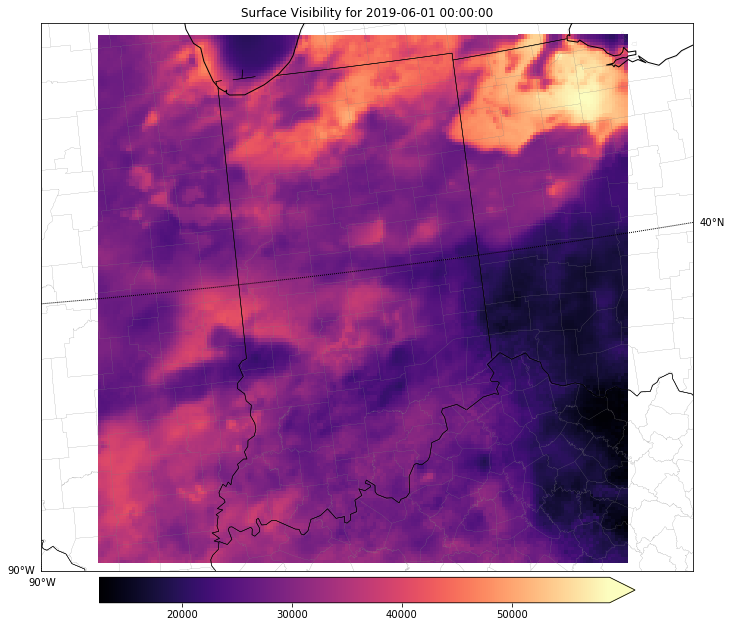

In [238]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(12,12), edgecolor='w')

m=Basemap(projection='lcc', rsphere=(6378137.00,6356752.3142),
          lat_0=38.5, lon_0=-97.5, resolution='i', area_thresh=2000, 
          llcrnrlon=-90, llcrnrlat=37.7, urcrnrlon=-82, urcrnrlat=41.7)

m.pcolormesh(sub['lon'], sub['lat'], sub['value'], latlon=True, cmap='magma')

m.drawcoastlines()
m.drawstates()
m.drawcounties(color='grey')

parallels = np.arange(0.,81,10.)
m.drawparallels(parallels,labels=[False,True,True,False])

meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])

cb = plt.colorbar(orientation='horizontal', pad=.01, shrink=.8, extend='max')

plt.title('Surface Visibility for ' + str(date));

## Time to build out a dataset!
I've shown how to get the data out using Blaylock's code, now it's time to work with xarray and
Blaylock's functions to build out a dataset for a range of dates and save the resulting xarray to
a netcdf file.

For the sake of simplicity and keeping this notebook manageable, we'll only do a few variables.
Not all of them, that's for the dedicated script that will be ran on the cluster.

In [299]:
variables = ['VIS:surface']#, 'GUST:surface', 'TMP:surface', 'TMP:2 m', 'DPT:2 m']
dates = pd.date_range(start=datetime(2019,6,1,0,0), end=datetime(2019,6,1,23,0), freq='H')

In [304]:
# !!!!! Feature to add - It may be worthwile to pull some of the attributes during get_variable step and insert them into the data arrays. 

datasets = []
timeSliceArrays = []

# get variables for each date
for date in dates:
    ds = xr.Dataset() # Keeps the datasets small to avoid growing datasets too large in a loop.
    for var in variables:
        data = get_hrrr_variable(date, var, fxx=0, model='hrrr',
                                field='sfc', removeFile=True,
                                value_only=False, verbose=True,
                                outDIR='/tmp/'); #/tmp/ is a cluster directory
        
        # lat/lon values have been chosen to center on Indiana
        data = hrrr_subset(data, half_box=85, lat=39.7684, 
                           lon=-86.1581, verbose=True)

        ds[var] = xr.DataArray(data['value'], dims=['y','x'],
                                            coords = {'lon': (('y','x'), data['lon']),
                                                      'lat': (('y','x'), data['lat']),
                                                      'time': ((), date)},
                                            name = var)

    datasets.append(ds)


 >> Dowloading tempfile: /tmp/temp_hrrr_2019060100_f00_VIS.grib2
Oh, good, you requested a date that should be on Pando.
GRIB2 File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190601/hrrr.t00z.wrfsfcf00.grib2
 .idx File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190601/hrrr.t00z.wrfsfcf00.grib2.idx
 >> Matched a variable:  4:838541:d=2019060100:VIS:surface:anl:
 >> Byte Range: 838541 2186833
  Run Date: 2019-06-01 00:00 UTC F00
Valid Date: 2019-06-01 00:00 UTC
 >> Requested Center lat: 39.7684	 lon: -86.1581
 >>     Plucked HRRR lat: 39.76670180734569	 lon: -86.14324788275631
 >>     Plucked from   x: 596	   y: 1222
 >> Size of subset: 170 x 170 grid points

 >> Dowloading tempfile: /tmp/temp_hrrr_2019060101_f00_VIS.grib2
Oh, good, you requested a date that should be on Pando.
GRIB2 File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190601/hrrr.t01z.wrfsfcf00.grib2
 .idx File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20190601/hrrr.t01z.wrfsfcf00.grib2.idx
 >> Matched a variable

In [301]:
# Verify that your datasets size is sensible
print(len(datasets))

24


In [302]:
# Combine all datasets into a single dataset
# !!!!! You may need to do this in chunks as you write to a file eventually.
ds = xr.concat(datasets,dim='time')  

#take a look at your final dataset
#print(ds)

13 ms ± 259 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [303]:
# Lets save that dataset as a netCDF file now.
ds.to_netcdf(path='/home/wdownin/tmp/singleVar_singleDay.nc', mode='w')

38.5 ms ± 2.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [290]:
# Determine the file size of the resulting netcdf
fsize = os.path.getsize('/home/wdownin/tmp/singleVar_singleDay.nc')
print(str(fsize*0.000001) + ' MB')

3.2475 MB


# Estimates for 1 year of data and 32 variables.
It's important to have a size estimate for your data storage. Estimations can now be made given that we have a single variable for a 1 day.

In [295]:
# 1 variable for 1 year
# take your current byte size, multiply by 365
oneVar_oneYear_size = fsize * 365
print( 'A full year of data for a single variable is ' + str( round(oneVar_oneYear_size*0.000001, 2) ) + ' MB')

A full year of data for a single variable is 1185.34 MB


In [297]:
# Now, time to scale up to all 32 variables!
allVar_oneYear_size = oneVar_oneYear_size * 32
print( 'A full year of data for 32 variables is ' + str( round(allVar_oneYear_size*0.000001, 2) ) + ' MB')

A full year of data for 32 variables is 37930.8 MB


# Time Estimates?
It's not shown in the notebook but I did run this process with the %%timeit cell magic. It takes about 10 minutes to run the test
but the result is 1 variable for 1 day in about 41 seconds. This equates to about 4.2 hours for all 32 variables for 1 year of data.

So 10 hours on the cluster should be enough to pull down all of the data but to be safe, request 20 or 30.

## Summary?
- 41 seconds per variable per day
- 4.2 hours for the full 32 variables for 1 year